## 🧼 Basic Data Preprocessing Workflow

This section outlines the key steps taken to preprocess the main datasets (`application_train.csv` and `application_test.csv`) for credit risk modeling.

---

### 🔹 1. Load the Data
- Import `application_train.csv` and `application_test.csv`
- Display basic info, shape, and sample rows

---

### 🔹 2. Handle Missing Values
- Identify columns with missing values
- Drop columns with too many missing values
- Fill numerical columns with median or mean
- Fill categorical columns with mode or "Unknown"

---

### 🔹 3. Fix Data Anomalies
- Correct or flag outliers if needed

---

### 🔹 4. Encode Categorical Variables
- Use Label Encoding for binary categorical features
- Use One-Hot Encoding for nominal features with <10–15 unique categories
- Ensure train and test sets have matching columns after encoding

---

### 🔹 5. Align Train and Test Sets
- Align both datasets to have the same features
- Retain `TARGET` column in training set

---

### 🔹 6. Feature Scaling
- Apply MinMaxScaler or StandardScaler to normalize feature ranges

---

### 🔹 7. Save Preprocessed Data
- Save cleaned train and test datasets

---

This preprocessing sets the foundation for robust modeling and ensures consistency between training and testing pipelines.

---
### Import Libraries


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Read train and test data
train = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/application_test.csv')

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [90]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [91]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
print(train.shape)
print(test.shape)

(307511, 122)
(48744, 121)


### Handling Missing values

In [93]:
train.isnull().sum()


SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [94]:
test.isnull().sum()

SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_YEAR    6049
Length: 121, dtype: int64

In [95]:
# function to identify columns and thier missing percentages values
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [96]:
# columns with more than 40% missing values in train dataset
missing_values(train).loc[missing_values(train)['Percent'] > 0.4]

,Total,Percent
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [97]:
missing_values(train).loc[missing_values(train)['Percent'] > 0.4].index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATI

In [98]:
# columns with more than 40% missing values in test dataset
missing_values(test).loc[missing_values(test)['Percent'] > 0.4]

,Total,Percent
COMMONAREA_AVG,33495,0.687161
COMMONAREA_MODE,33495,0.687161
COMMONAREA_MEDI,33495,0.687161
NONLIVINGAPARTMENTS_AVG,33347,0.684125
NONLIVINGAPARTMENTS_MODE,33347,0.684125
NONLIVINGAPARTMENTS_MEDI,33347,0.684125
FONDKAPREMONT_MODE,32797,0.672842
LIVINGAPARTMENTS_AVG,32780,0.672493
LIVINGAPARTMENTS_MODE,32780,0.672493
LIVINGAPARTMENTS_MEDI,32780,0.672493


In [99]:
missing_values(test).loc[missing_values(test)['Percent'] > 0.4].index

Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'HOUSETYPE_MODE', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEX

**Droppig columns which have more than 40% missiang values**

In [100]:
train.drop(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE',
       'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE'], axis=1, inplace=True)


In [101]:
test.drop(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG',
       'FLOORSMIN_MODE', 'OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'LANDAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'ELEVATORS_AVG',
       'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
       'APARTMENTS_AVG', 'HOUSETYPE_MODE', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MODE', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'EXT_SOURCE_1'], axis=1, inplace=True)

In [102]:
print(train.shape)
print(test.shape)

(307511, 73)
(48744, 72)


In [103]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [104]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   48744 non-null  int64  
 1   NAME_CONTRACT_TYPE           48744 non-null  object 
 2   CODE_GENDER                  48744 non-null  object 
 3   FLAG_OWN_CAR                 48744 non-null  object 
 4   FLAG_OWN_REALTY              48744 non-null  object 
 5   CNT_CHILDREN                 48744 non-null  int64  
 6   AMT_INCOME_TOTAL             48744 non-null  float64
 7   AMT_CREDIT                   48744 non-null  float64
 8   AMT_ANNUITY                  48720 non-null  float64
 9   AMT_GOODS_PRICE              48744 non-null  float64
 10  NAME_TYPE_SUITE              47833 non-null  object 
 11  NAME_INCOME_TYPE             48744 non-null  object 
 12  NAME_EDUCATION_TYPE          48744 non-null  object 
 13  NAME_FAMILY_STAT

In [105]:
missing_values(train).loc[missing_values(train)['Percent'] > 0.4]

,Total,Percent


In [106]:
missing_values(test).loc[missing_values(test)['Percent'] > 0.4]

,Total,Percent


Now there is no columns which have more than 40% missing values

### Handling missing values of the Train dataset

In [107]:
missing_values(train)

,Total,Percent
OCCUPATION_TYPE,96391,0.313455
EXT_SOURCE_3,60965,0.198253
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


In [108]:
train['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [109]:
train['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [110]:
train['OCCUPATION_TYPE'].isnull().sum()

96391

### Filling the missing values with random categories from the existing categories of occupation type

In [111]:
# Get all existing (non-null) occupation types
existing_categories = train['OCCUPATION_TYPE'].dropna().unique()
existing_categories

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [112]:
# Number of missing values
num_missing = train['OCCUPATION_TYPE'].isnull().sum()
num_missing

96391

In [113]:
# Generate random values from the existing categories
random_choices = np.random.choice(existing_categories, size=num_missing, replace=True)
random_choices

array(['IT staff', 'Medicine staff', 'Managers', ...,
       'High skill tech staff', 'IT staff', 'Realty agents'], dtype=object)

In [114]:
# Assign them to the missing locations
train.loc[train['OCCUPATION_TYPE'].isnull(), 'OCCUPATION_TYPE'] = random_choices

In [115]:
train['OCCUPATION_TYPE'].isnull().sum()

0

In [116]:
train['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 60546
Sales staff              37440
Core staff               32945
Managers                 26687
Drivers                  24112
High skill tech staff    16778
Accountants              15028
Medicine staff           13943
Security staff           12136
Cooking staff            11201
Cleaning staff           10093
Private service staff     7977
Low-skill Laborers        7501
Waiters/barmen staff      6722
Secretaries               6547
Realty agents             6074
HR staff                  5987
IT staff                  5794
Name: count, dtype: int64

In [117]:
missing_values(train)

,Total,Percent
EXT_SOURCE_3,60965,0.198253
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


#### Now Treating EXT_SOURCE_3 column

In [118]:
train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

In [119]:
train['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

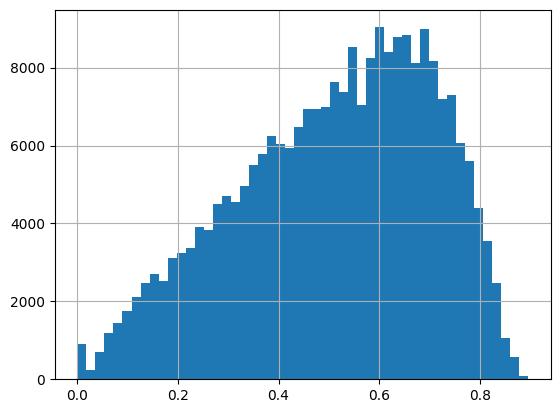

In [120]:
# Plot the distribution of EXT_SOURCE_3
train['EXT_SOURCE_3'].hist(bins=50)
plt.show()

**Filling Random values in the missing rows in EXT_SOURCE_3 column from existing non_null values to keep the distribution of the dataset same**

In [121]:
non_null_values = train['EXT_SOURCE_3'].dropna()

In [123]:
train['EXT_SOURCE_3'] = train['EXT_SOURCE_3'].apply(
    lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x
)

In [124]:
train['EXT_SOURCE_3'].isnull().sum()

0

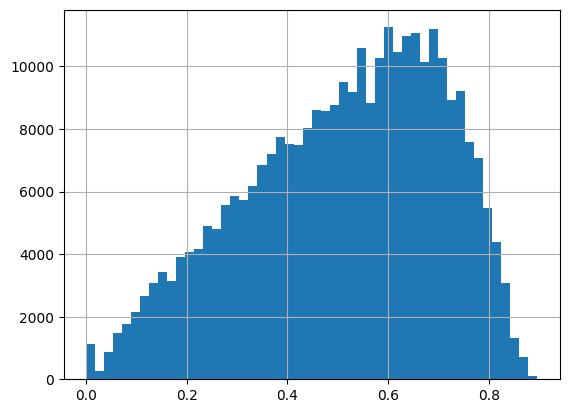

In [125]:
# Plot the distribution of EXT_SOURCE_3
train['EXT_SOURCE_3'].hist(bins=50)
plt.show()

In [126]:
missing_values(train)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_YEAR,41519,0.135016
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


#### Treating AMT_REQ_CREDIT_BUREAU_YEAR Column 

In [131]:
train['AMT_REQ_CREDIT_BUREAU_YEAR']

0         1.0
1         0.0
2         0.0
3         NaN
4         0.0
         ... 
307506    NaN
307507    NaN
307508    1.0
307509    0.0
307510    1.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, Length: 307511, dtype: float64

In [137]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [140]:
# Fill missing values of AMT_REQ_CREDIT_BUREAU_YEAR with top 5 frequent values
train['AMT_REQ_CREDIT_BUREAU_YEAR'] = train['AMT_REQ_CREDIT_BUREAU_YEAR'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts().index[:5]) if pd.isnull(x) else x
)

In [141]:
train['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     80190
1.0     71615
2.0     58618
3.0     41845
4.0     28991
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [142]:
missing_values(train)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_QRT,41519,0.135016
AMT_REQ_CREDIT_BUREAU_MON,41519,0.135016
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


#### Treating AMT_REQ_CREDIT_BUREAU_QRT column

In [144]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [145]:
# fill missing values of AMT_REQ_CREDIT_BUREAU_QRT with top 3 frequent values
train['AMT_REQ_CREDIT_BUREAU_QRT'] = train['AMT_REQ_CREDIT_BUREAU_QRT'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts().index[:3]) if pd.isnull(x) else x
)

In [146]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      229381
1.0       47468
2.0       28361
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

#### Treating AMT_REQ_CREDIT_BUREAU_MON column

In [147]:
train['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [148]:
# fill missing values of AMT_REQ_CREDIT_BUREAU_MON with top 3 frequent values
train['AMT_REQ_CREDIT_BUREAU_MON'] = train['AMT_REQ_CREDIT_BUREAU_MON'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_MON'].value_counts().index[:3]) if pd.isnull(x) else x
)

In [149]:
train['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     235938
1.0      47076
2.0      19271
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

In [150]:
missing_values(train)

,Total,Percent
AMT_REQ_CREDIT_BUREAU_WEEK,41519,0.135016
AMT_REQ_CREDIT_BUREAU_DAY,41519,0.135016
AMT_REQ_CREDIT_BUREAU_HOUR,41519,0.135016
NAME_TYPE_SUITE,1292,0.004201
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


#### Treating AMT_REQ_CREDIT_BUREAU_WEEK column

In [151]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

In [152]:
# fill missing values of AMT_REQ_CREDIT_BUREAU_WEEK with top 2 Frequent values
train['AMT_REQ_CREDIT_BUREAU_WEEK'] = train['AMT_REQ_CREDIT_BUREAU_WEEK'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts().index[:2]) if pd.isnull(x) else x
)


In [153]:
train['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    278439
1.0     28744
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

#### Treating AMT_REQ_CREDIT_BUREAU_DAY column

In [154]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [155]:
# fill missing values of AMT_REQ_CREDIT_BUREAU_DAY with top 2 Frequent values
train['AMT_REQ_CREDIT_BUREAU_DAY'] = train['AMT_REQ_CREDIT_BUREAU_DAY'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts().index[:2]) if pd.isnull(x) else x
)

In [156]:
train['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    285294
1.0     22020
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

#### Treating AMT_REQ_CREDIT_BUREAU_HOUR column

In [157]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [158]:
# fill missing values of AMT_REQ_CREDIT_BUREAU_HOUR with top 2 Frequent values
train['AMT_REQ_CREDIT_BUREAU_HOUR'] = train['AMT_REQ_CREDIT_BUREAU_HOUR'].apply(
    lambda x: np.random.choice(train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts().index[:2]) if pd.isnull(x) else x
)

In [159]:
train['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    285302
1.0     22143
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [160]:
missing_values(train)

,Total,Percent
NAME_TYPE_SUITE,1292,0.004201
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003320
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003320
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003320
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
TARGET,0,0.000000


#### dropping missing rows from every remaining column because they have less than 0.5% missing values

In [161]:
# drop missing values from NAME_TYPE_SUITE
train = train.dropna(subset=['NAME_TYPE_SUITE'])
missing_values(train)

,Total,Percent
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.003334
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.003334
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.003334
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.003334
EXT_SOURCE_2,659,0.002152
...,...,...
FLAG_CONT_MOBILE,0,0.000000
FLAG_WORK_PHONE,0,0.000000
FLAG_EMP_PHONE,0,0.000000
FLAG_MOBIL,0,0.000000


In [162]:
# drop missing values from EXT_SOURCE_2
train = train.dropna(subset=['EXT_SOURCE_2'])
missing_values(train)

,Total,Percent
OBS_30_CNT_SOCIAL_CIRCLE,1017,0.003328
DEF_30_CNT_SOCIAL_CIRCLE,1017,0.003328
OBS_60_CNT_SOCIAL_CIRCLE,1017,0.003328
DEF_60_CNT_SOCIAL_CIRCLE,1017,0.003328
AMT_ANNUITY,12,0.000039
...,...,...
FLAG_CONT_MOBILE,0,0.000000
FLAG_WORK_PHONE,0,0.000000
FLAG_EMP_PHONE,0,0.000000
FLAG_MOBIL,0,0.000000


In [163]:
# drop missing values from OBS_30_CNT_SOCIAL_CIRCLE
train = train.dropna(subset=['OBS_30_CNT_SOCIAL_CIRCLE'])
missing_values(train)

,Total,Percent
AMT_ANNUITY,12,0.000039
DAYS_LAST_PHONE_CHANGE,0,0.000000
FLAG_DOCUMENT_8,0,0.000000
FLAG_DOCUMENT_7,0,0.000000
FLAG_DOCUMENT_6,0,0.000000
...,...,...
FLAG_CONT_MOBILE,0,0.000000
FLAG_WORK_PHONE,0,0.000000
FLAG_EMP_PHONE,0,0.000000
FLAG_MOBIL,0,0.000000


In [164]:
# drop missing values from AMT_ANNUITY
train = train.dropna(subset=['AMT_ANNUITY'])
missing_values(train)

,Total,Percent
SK_ID_CURR,0,0.0
REG_CITY_NOT_WORK_CITY,0,0.0
FLAG_DOCUMENT_8,0,0.0
FLAG_DOCUMENT_7,0,0.0
FLAG_DOCUMENT_6,0,0.0
...,...,...
FLAG_CONT_MOBILE,0,0.0
FLAG_WORK_PHONE,0,0.0
FLAG_EMP_PHONE,0,0.0
FLAG_MOBIL,0,0.0


In [165]:
train.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [167]:
train.shape

(304531, 73)

- There are no missing values in the train dataset

### Handling missing values in the test dataset

In [166]:
missing_values(test)

,Total,Percent
OCCUPATION_TYPE,15605,0.320142
EXT_SOURCE_3,8668,0.177827
AMT_REQ_CREDIT_BUREAU_YEAR,6049,0.124097
AMT_REQ_CREDIT_BUREAU_QRT,6049,0.124097
AMT_REQ_CREDIT_BUREAU_MON,6049,0.124097
...,...,...
REG_REGION_NOT_LIVE_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_CITY_NOT_LIVE_CITY,0,0.000000
